In [18]:
import os

import jax.random as jr
import matplotlib.pyplot as plt
import numpy as np
import pandas as pd
import seaborn as sns

from cnpe_validation.utils import get_abspath_project_root

os.chdir(get_abspath_project_root())

In [19]:
from cnpe_validation.tasks.available_tasks import get_available_tasks

tasks = get_available_tasks()
tasks.pop("eight_schools") # TODO memory error

cnpe_validation.tasks.eight_schools.EightSchoolsTask

In [21]:
method_names = [
    "ELBO",
    "Maximum likelihood",
    "NPE-PP (reparameterized sampling=True)",
    "NPE-PP (reparameterized sampling=False)",
    "NPE-PP (Fixed proposal)",
    ]

metric_names = [
    "mean_log_prob_reference",
    "coverage_probabilities",
    "posterior_mean_l2",
]

results = {task_name: {method_name: [] for method_name in method_names} for task_name in tasks.keys()}


for task_name in tasks.keys():
    for method_name in method_names:
        files = [f for f in os.listdir(f"results/{task_name}") if method_name in f]
        for file in files:
            results[task_name][method_name].append(dict(np.load(f"results/{task_name}/{file}")))

for task_name in tasks.keys():
    for method_name in method_names:
        results[task_name][method_name] = {
            metric_name: np.stack([run[metric_name] for run in results[task_name][method_name]]) for metric_name in metric_names
        }

            

/tmp/ipykernel_594386/2831736621.py:17: UserWarning: Tight layout not applied. tight_layout cannot make axes width small enough to accommodate all axes decorations
  fig.tight_layout()


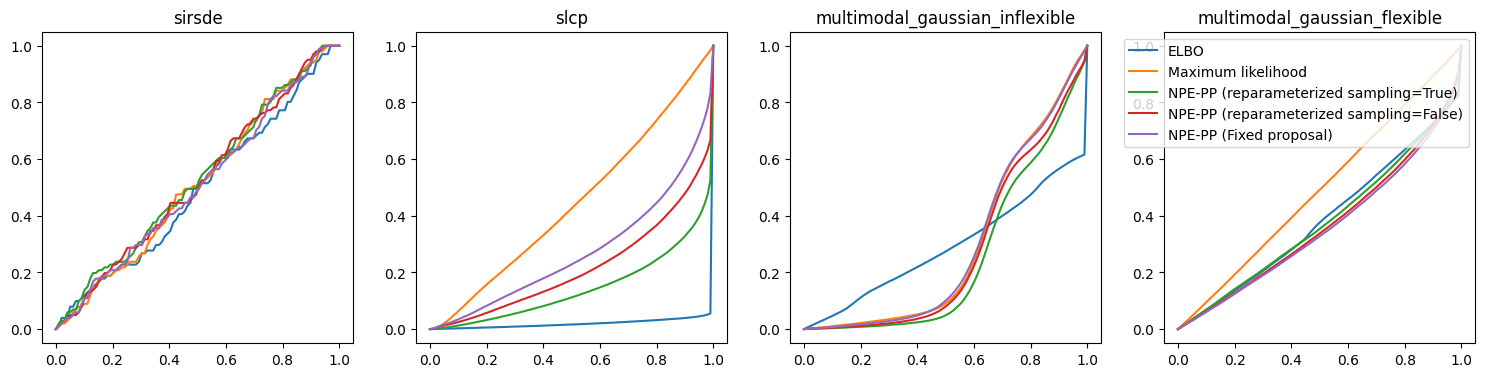

In [22]:

# Coverage first...

fig, axes = plt.subplots(ncols=len(tasks))

for (task_name, task_result), ax in zip(results.items(), axes):
    for method_name in method_names:
        nominal_frequency = np.linspace(0, 1, 100)
        ax.plot(
            nominal_frequency,
            task_result[method_name]["coverage_probabilities"].mean(axis=0),
            label=method_name,
            )
        ax.set_box_aspect(1)
        ax.set_title(task_name) 
        
plt.legend()
fig.tight_layout()
fig.set_size_inches(18.5, 10.5)




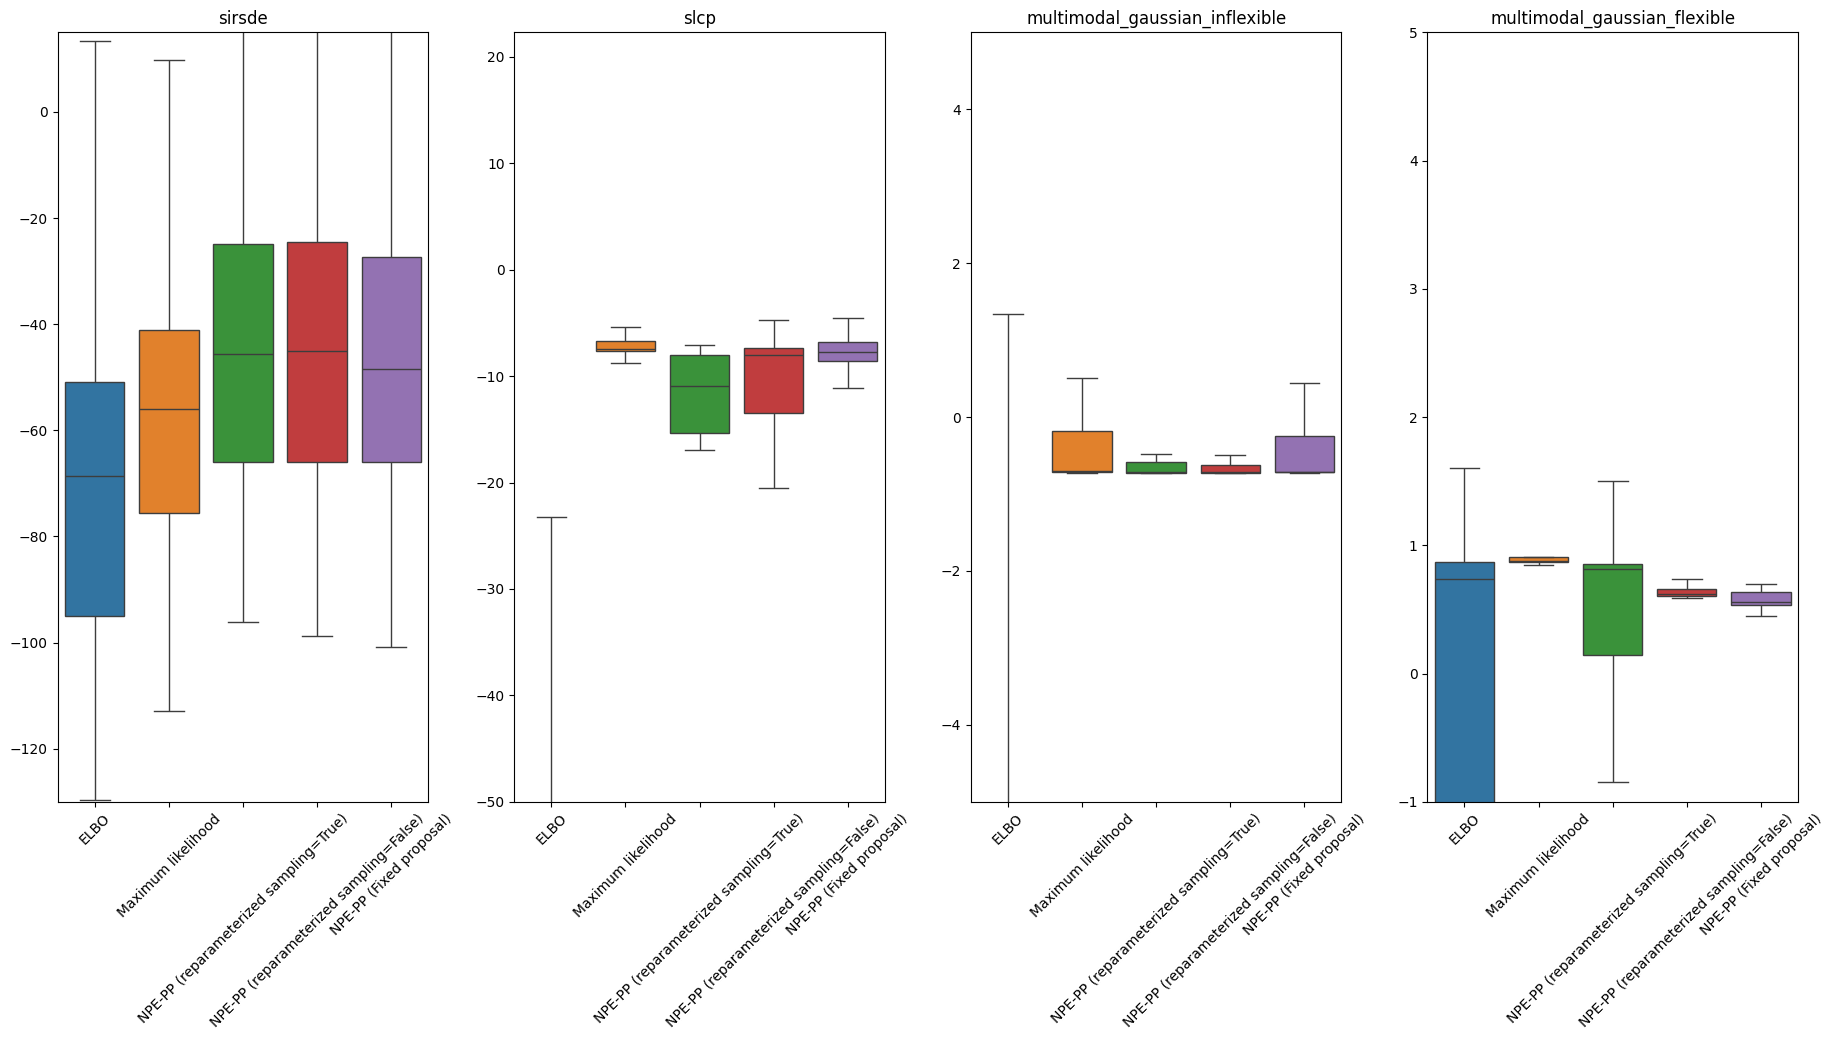

In [27]:

# Coverage first...
import seaborn as sns
fig, axes = plt.subplots(ncols=len(tasks))

y_lims = [
    (-130, 15),
    (-50, 22.3),
    (-5, 5),
    (-1, 5),
    (-1, 3),
]
for (task_name, task_result), ax, y_lim in zip(results.items(), axes, y_lims):

    df = pd.DataFrame(
        {method_name: task_result[method_name]["mean_log_prob_reference"] for method_name in method_names}
    )
    sns.boxplot(df, ax=ax, showfliers=False)
    
    ax.set_title(task_name) 
    ax.set_ylim(*y_lim)
    ax.tick_params(axis='x', rotation=45)

    
fig.set_size_inches(18.5, 10.5)
fig.tight_layout()




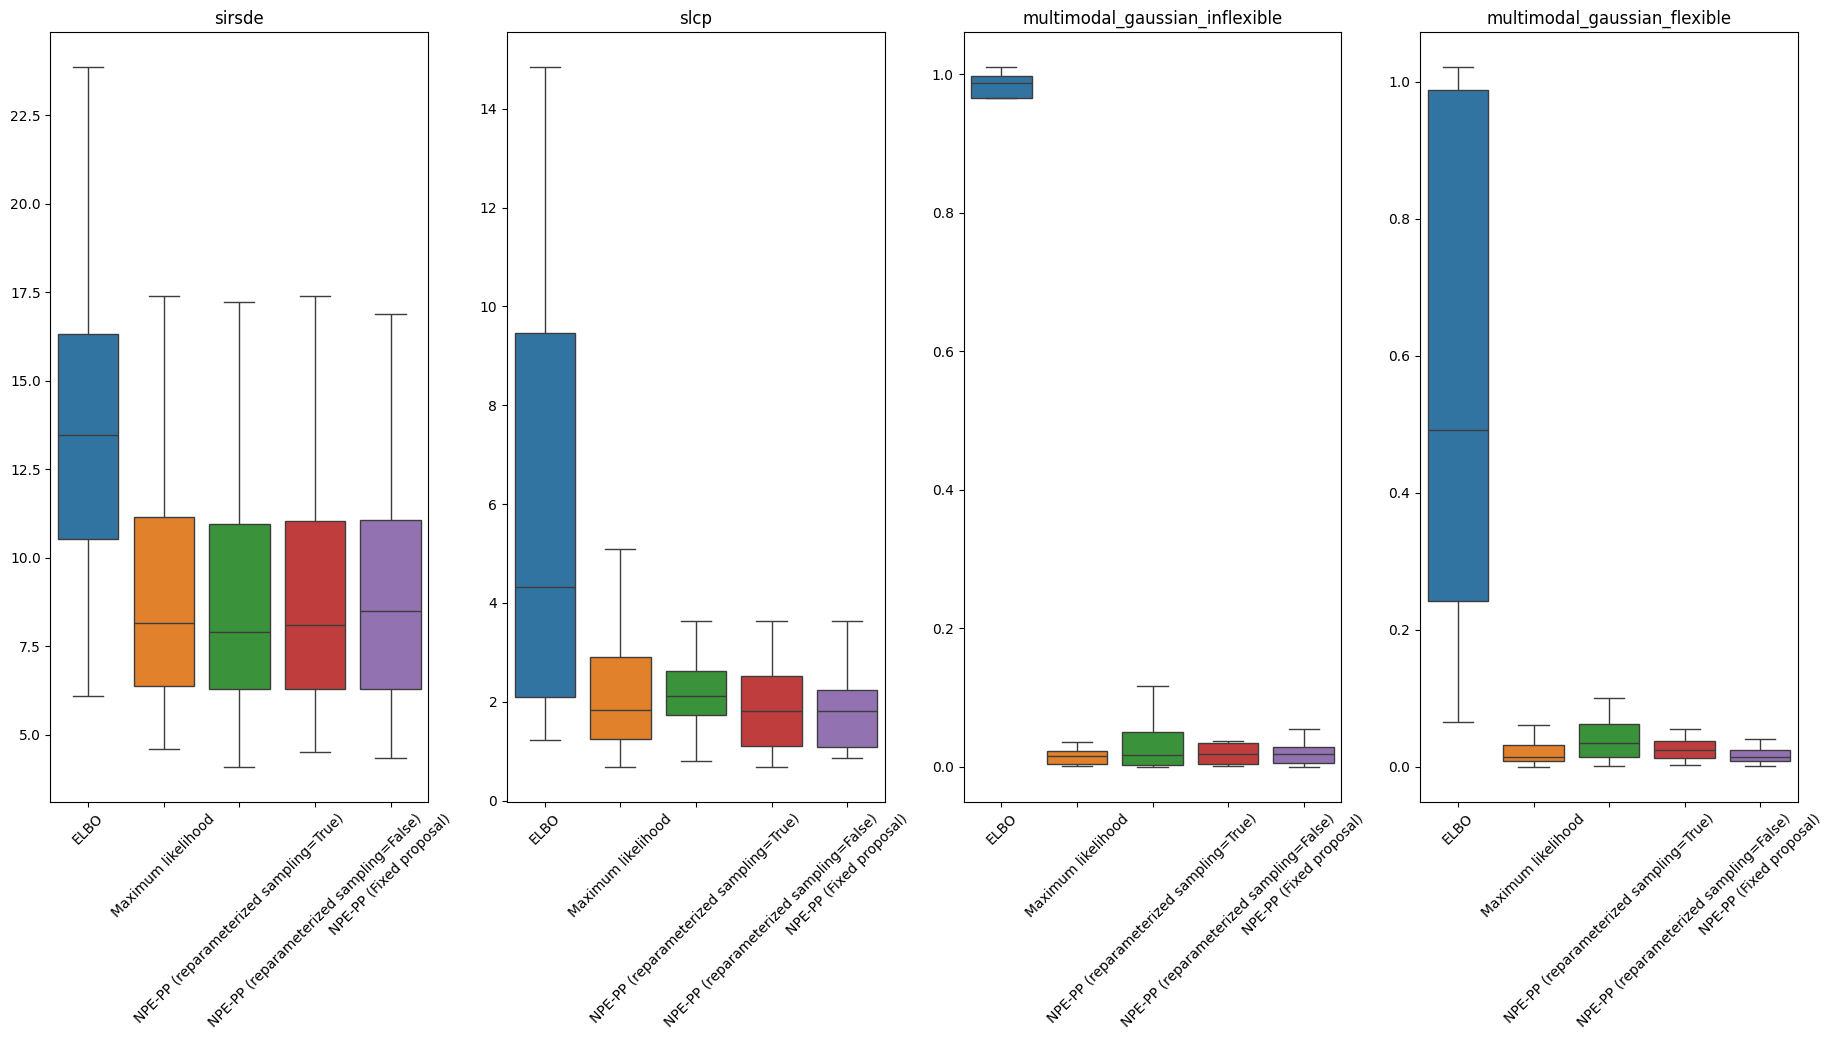

In [28]:
# Coverage first...
import seaborn as sns
fig, axes = plt.subplots(ncols=len(tasks))


for (task_name, task_result), ax, y_lim in zip(results.items(), axes, y_lims):

    df = pd.DataFrame(
        {method_name: task_result[method_name]["posterior_mean_l2"] for method_name in method_names}
    )
    sns.boxplot(df, ax=ax, showfliers=False)
    ax.set_title(task_name) 
    ax.tick_params(axis='x', rotation=45)

    
fig.set_size_inches(18.5, 10.5)
fig.tight_layout()
